In [97]:
import pandas as pd
import matplotlib.pyplot as plt

In [98]:
# Membaca Data
data = pd.read_csv('magang_msib.csv')
data.head()

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1.795083e+18,Mon May 27 13:20:00 +0000 2024,0,Untircoy! Msib itu nanti buat tempat magang ny...,1.795083e+18,NaN,NaN,in,UNTIRTA,0.0,2.0,0.0,https://x.com/untirtafesss/status/179508252836...,1.164375e+18,untirtafesss
1,1.795074e+18,Mon May 27 12:45:42 +0000 2024,0,Lowongan magang MSIB batch 7 ini kenapa pada m...,1.795074e+18,NaN,NaN,in,NaN,0.0,0.0,0.0,https://x.com/pocameca/status/1795073897496215606,1.292139e+18,pocameca
2,1.794914e+18,Mon May 27 12:27:52 +0000 2024,0,@akualcade semoga keterima di magang msib 7,1.795069e+18,NaN,akualcade,in,NaN,0.0,0.0,0.0,https://x.com/BITTER5UITE/status/1795069408257...,1.235029e+18,BITTER5UITE
3,1.795043e+18,Mon May 27 12:26:31 +0000 2024,0,@masudnh sama bisa magang gitu atau msib lagi ...,1.795069e+18,NaN,masudnh,in,Di Bumi Tercinta,0.0,2.0,0.0,https://x.com/IqbalRa17664055/status/179506906...,1.419974e+18,IqbalRa17664055
4,1.795064e+18,Mon May 27 12:04:51 +0000 2024,0,ï¸manifestingï¸ keterima magang msib/mandiri...,1.795064e+18,NaN,NaN,in,"hey u, cheer up! || ily",0.0,0.0,0.0,https://x.com/kDY06/status/1795063615403196625,1.131185e+18,kDY06


In [99]:
# Pilih kolom yang ingin digunakan
data = data[['full_text','username','created_at']]
data.head()

,full_text,username,created_at
0,Untircoy! Msib itu nanti buat tempat magang ny...,untirtafesss,Mon May 27 13:20:00 +0000 2024
1,Lowongan magang MSIB batch 7 ini kenapa pada m...,pocameca,Mon May 27 12:45:42 +0000 2024
2,@akualcade semoga keterima di magang msib 7,BITTER5UITE,Mon May 27 12:27:52 +0000 2024
3,@masudnh sama bisa magang gitu atau msib lagi ...,IqbalRa17664055,Mon May 27 12:26:31 +0000 2024
4,ï¸manifestingï¸ keterima magang msib/mandiri...,kDY06,Mon May 27 12:04:51 +0000 2024


In [100]:
# Pelabelan Sentimen
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

nltk.download('vader_lexicon')

def get_sentiment_vader(text):
    sia = SentimentIntensityAnalyzer()
    sentiment = sia.polarity_scores(text)
    
    if sentiment['compound'] >= 0.05:
        return 'positive'
    elif sentiment['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'

data['sentiment'] = data['full_text'].apply(get_sentiment_vader)
data.to_csv("data_sentiment.csv", index=False)
data.head()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\oktav\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,full_text,username,created_at,sentiment
0,Untircoy! Msib itu nanti buat tempat magang ny...,untirtafesss,Mon May 27 13:20:00 +0000 2024,neutral
1,Lowongan magang MSIB batch 7 ini kenapa pada m...,pocameca,Mon May 27 12:45:42 +0000 2024,neutral
2,@akualcade semoga keterima di magang msib 7,BITTER5UITE,Mon May 27 12:27:52 +0000 2024,neutral
3,@masudnh sama bisa magang gitu atau msib lagi ...,IqbalRa17664055,Mon May 27 12:26:31 +0000 2024,neutral
4,ï¸manifestingï¸ keterima magang msib/mandiri...,kDY06,Mon May 27 12:04:51 +0000 2024,neutral


In [101]:
data = data[['full_text','sentiment']]
data.head()

,full_text,sentiment
0,Untircoy! Msib itu nanti buat tempat magang ny...,neutral
1,Lowongan magang MSIB batch 7 ini kenapa pada m...,neutral
2,@akualcade semoga keterima di magang msib 7,neutral
3,@masudnh sama bisa magang gitu atau msib lagi ...,neutral
4,ï¸manifestingï¸ keterima magang msib/mandiri...,neutral


In [103]:
# 
import re

def clean_twitter_text(text):
    text = re.sub(r'@[A-Za-z0-9_]+', '',text)
    text = re.sub(r'#\w+', '',text)
    text = re.sub(r'RT[\s]+', '',text)
    text = re.sub(r'https?://\S+', '',text)
    text = re.sub(r'[^A-Za-z0-9 ]', '',text)
    text = re.sub(r'\s+', ' ', text).strip()
    text = re.sub(r'\d+', '', text)

    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)



    return text

data['full_text'] = data['full_text'].apply(clean_twitter_text)
data['full_text'] = data['full_text'].str.lower()
data.to_csv('data_cleaning.csv',index=False)
data

,full_text,sentiment
0,untircoy msib itu nanti buat tempat magang nya...,neutral
1,lowongan magang msib batch ini kenapa pada mak...,neutral
2,semoga keterima di magang msib,neutral
3,sama bisa magang gitu atau msib lagi sebel gua,neutral
4,manifesting keterima magang msibmandiri dengan...,neutral
...,...,...
248,cm yg ikut magang msib itu beneran langsung ke...,neutral
249,cm yang prodi kesmas dulu magang msib dimanaa,neutral
250,temen pejuang msib yg lg pengen daftar magang ...,neutral
251,hi alllll aku open ya buat temen yang lagi app...,positive


In [104]:
def expand_repeated_words(text):
    # Pola regex untuk menemukan kata yang diikuti dengan angka pengulangan
    pattern = re.compile(r'(\b\w+)(\d)')
    return pattern.sub(lambda x: '-'.join([x.group(1)] * int(x.group(2))), text)

def remove_repeated_characters(text):
    # Pola regex untuk mengganti karakter berulang lebih dari dua kali
    return re.sub(r'(.)\1+', r'\1', text)

# Terapkan fungsi ke kolom DataFrame
data['cleaned_text'] = data['full_text'].apply(remove_repeated_characters)
# Terapkan fungsi ke kolom DataFrame
data['expanded_text'] = data['cleaned_text'].apply(expand_repeated_words)
data

,full_text,sentiment,cleaned_text,expanded_text
0,untircoy msib itu nanti buat tempat magang nya...,neutral,untircoy msib itu nanti buat tempat magang nya...,untircoy msib itu nanti buat tempat magang nya...
1,lowongan magang msib batch ini kenapa pada mak...,neutral,lowongan magang msib batch ini kenapa pada mak...,lowongan magang msib batch ini kenapa pada mak...
2,semoga keterima di magang msib,neutral,semoga keterima di magang msib,semoga keterima di magang msib
3,sama bisa magang gitu atau msib lagi sebel gua,neutral,sama bisa magang gitu atau msib lagi sebel gua,sama bisa magang gitu atau msib lagi sebel gua
4,manifesting keterima magang msibmandiri dengan...,neutral,manifesting keterima magang msibmandiri dengan...,manifesting keterima magang msibmandiri dengan...
...,...,...,...,...
248,cm yg ikut magang msib itu beneran langsung ke...,neutral,cm yg ikut magang msib itu beneran langsung ke...,cm yg ikut magang msib itu beneran langsung ke...
249,cm yang prodi kesmas dulu magang msib dimanaa,neutral,cm yang prodi kesmas dulu magang msib dimana,cm yang prodi kesmas dulu magang msib dimana
250,temen pejuang msib yg lg pengen daftar magang ...,neutral,temen pejuang msib yg lg pengen daftar magang ...,temen pejuang msib yg lg pengen daftar magang ...
251,hi alllll aku open ya buat temen yang lagi app...,positive,hi al aku open ya buat temen yang lagi aply ke...,hi al aku open ya buat temen yang lagi aply ke...


In [105]:
# Normalisasi
normalization_dict =  {
         'gua':'saya', 'sebel':'kesal', 'matkul':'mata kuliah', 'gaada':'tidak ada', 'nder':'', 'tuwa':'tua', 'trs':'terus', 'nuker':'tukar',
         'lo':'kamu', 'org':'orang', 'tp':'tapi', 'sm': 'sama', 'jd':'jadi', 'smpe':'sampai', 'jgn':'jangan', 'gw':'saya', 'pdhal':'padahal',
         'bundir':'bunuh diri', 'liat':'lihat', 'ga':'tidak', 'u':'kamu', 'yg':'yang', 'ngasih':'memberi', 'dapet':'dapat', 'pdhl':'padahal',
         'udh':'sudah', 'tau':'tahu', 'dapet':'dapat', 'knp':'kenapa', 'gt':'gitu', 'kmren':'kemarin', 'plis':'tolong', 'w':'saya',
         'emg':'memang', 'tmn':'teman', 'apk':'aplikasi', 'aku':'saya', 'iyesh':'iya', 'gimana':'bagaimana', 'gue':'saya', 'gausah':'tidak perlu',
         'temen':'teman', 'smt':'semester', 'skrg':'sekarang', 'udah':'sudah', 'diem':'diam', 'jg':'juga', 'ntr':'nanti', 'dri':'dari',
         'bikin':'membuat', 'engga':'tidak', 'skalian':'sekalian', 'nitip':'titip', 'sapa':'siapa', 'gak':'tidak', 'kek':'seperti',
         'sieh':'sih', 'sender':'', 'sem':'semester', 'krn':'karena', 'ntu':'itu', 'ortu':'orang tua', 'kl':'kalau', 'krumunan':'kerumunan',
         'kelar':'selesai', 'halu':'halusinasi', 'ttp':'tetap', 'gasi':'tidak', 'menuhin':'memenuhi', 'karna':'karena', 'nnya':'tanya',
         'aja':'saja', 'dikit':'sedikit', 'ku':'saya', 'malem':'malam', 'sblmny':'sebelum', 'klo':'kalau', 'pas':'ketika', 'gak':'tidak',
         'cuman':'cuma', 'trims':'terima kasih', 'nyoba':'coba', 'ngga':'tidak', 'skrng':'sekarang', 'adek':'adik', 'kmrn':'kemarin',
         'tpi':'tapi', 'gitu':'begitu', 'univ':'universitas', 'y':'iya', 'mending':'lebih baik', 'bgt':'sangat', 'mo':'ingin', 'emang':'memang',
         'kangen':'rindu', 'drpda':'dari pada', 'mulu':'terus', 'kaga':'tidak', 'sebulan':'satu bulan', 'ksih':'kasih', 'jga':'juga',
         'bln':'bulan', 'bjir':'kasar', 'blum':'belum', 'abis':'habis', 'pengen':'ingin', 'wenak':'enak', 'dpt':'dapat', 'dh':'sudah',
         'ngabggur':'menganggur', 'cepet':'cepat', 'slese':'selesai', 'dr':'dari', 'dateng':'datang', 'monggo':'silahkan', 'tolol':'bodoh',
         'ato':'atau', 'juh':'jauh', 'nyari':'cari', 'samsek':'sama sekali', 'smster':'semester', 'bs':'bisa', 'kesmas':'kesehatan masyarakat',
         'demot':'demotivasi', 'untircoy':'', 'hi':'hai', 'lg':'lagi', 'ya':'iya', 'uda':'sudah', 'kak':'kakak', 'jir':'kasar', 'sling':'saling',
         'msib':'magang studi independen bersertifikat', 'tuker':'tukar', 'cm' : 'cuma','iya':'', 'wlpn':'walaupun', 'judes':'tidak ramah',
         'ad':'ada', 'pencet':'tekan', 'oiya':'oh iya', 'ky':'seperti', 'kureng':'kurang', 'gadapet':'tidak dapat', 'nulis':'tulis', 'fak':'kasar'
         }

def normalize_text(text):
    for word, replacement in normalization_dict.items():
        text = re.sub(r'\b' + word + r'\b', replacement, text)
    return text

data['expanded_text'] = data['expanded_text'].apply(lambda x: normalize_text(x))
data

,full_text,sentiment,cleaned_text,expanded_text
0,untircoy msib itu nanti buat tempat magang nya...,neutral,untircoy msib itu nanti buat tempat magang nya...,magang studi independen bersertifikat itu nan...
1,lowongan magang msib batch ini kenapa pada mak...,neutral,lowongan magang msib batch ini kenapa pada mak...,lowongan magang magang studi independen berser...
2,semoga keterima di magang msib,neutral,semoga keterima di magang msib,semoga keterima di magang magang studi indepen...
3,sama bisa magang gitu atau msib lagi sebel gua,neutral,sama bisa magang gitu atau msib lagi sebel gua,sama bisa magang begitu atau magang studi inde...
4,manifesting keterima magang msibmandiri dengan...,neutral,manifesting keterima magang msibmandiri dengan...,manifesting keterima magang msibmandiri dengan...
...,...,...,...,...
248,cm yg ikut magang msib itu beneran langsung ke...,neutral,cm yg ikut magang msib itu beneran langsung ke...,cuma yang ikut magang magang studi independen ...
249,cm yang prodi kesmas dulu magang msib dimanaa,neutral,cm yang prodi kesmas dulu magang msib dimana,cuma yang prodi kesehatan masyarakat dulu maga...
250,temen pejuang msib yg lg pengen daftar magang ...,neutral,temen pejuang msib yg lg pengen daftar magang ...,teman pejuang magang studi independen berserti...
251,hi alllll aku open ya buat temen yang lagi app...,positive,hi al aku open ya buat temen yang lagi aply ke...,hai al saya open buat teman yang lagi aply ke...


In [106]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('indonesian'))
data['no_sw'] = data['expanded_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
data.to_csv('data_stopword.csv',index=False)
data.head()

,full_text,sentiment,cleaned_text,expanded_text,no_sw
0,untircoy msib itu nanti buat tempat magang nya...,neutral,untircoy msib itu nanti buat tempat magang nya...,magang studi independen bersertifikat itu nan...,magang studi independen bersertifikat magang n...
1,lowongan magang msib batch ini kenapa pada mak...,neutral,lowongan magang msib batch ini kenapa pada mak...,lowongan magang magang studi independen berser...,lowongan magang magang studi independen berser...
2,semoga keterima di magang msib,neutral,semoga keterima di magang msib,semoga keterima di magang magang studi indepen...,semoga keterima magang magang studi independen...
3,sama bisa magang gitu atau msib lagi sebel gua,neutral,sama bisa magang gitu atau msib lagi sebel gua,sama bisa magang begitu atau magang studi inde...,magang magang studi independen bersertifikat k...
4,manifesting keterima magang msibmandiri dengan...,neutral,manifesting keterima magang msibmandiri dengan...,manifesting keterima magang msibmandiri dengan...,manifesting keterima magang msibmandiri posisi...


In [107]:
#lemmatization
from nltk.stem import WordNetLemmatizer

wordnet_lem = WordNetLemmatizer()
data['tweet'] = data['no_sw'].apply(wordnet_lem.lemmatize)
data

,full_text,sentiment,cleaned_text,expanded_text,no_sw,tweet
0,untircoy msib itu nanti buat tempat magang nya...,neutral,untircoy msib itu nanti buat tempat magang nya...,magang studi independen bersertifikat itu nan...,magang studi independen bersertifikat magang n...,magang studi independen bersertifikat magang n...
1,lowongan magang msib batch ini kenapa pada mak...,neutral,lowongan magang msib batch ini kenapa pada mak...,lowongan magang magang studi independen berser...,lowongan magang magang studi independen berser...,lowongan magang magang studi independen berser...
2,semoga keterima di magang msib,neutral,semoga keterima di magang msib,semoga keterima di magang magang studi indepen...,semoga keterima magang magang studi independen...,semoga keterima magang magang studi independen...
3,sama bisa magang gitu atau msib lagi sebel gua,neutral,sama bisa magang gitu atau msib lagi sebel gua,sama bisa magang begitu atau magang studi inde...,magang magang studi independen bersertifikat k...,magang magang studi independen bersertifikat k...
4,manifesting keterima magang msibmandiri dengan...,neutral,manifesting keterima magang msibmandiri dengan...,manifesting keterima magang msibmandiri dengan...,manifesting keterima magang msibmandiri posisi...,manifesting keterima magang msibmandiri posisi...
...,...,...,...,...,...,...
248,cm yg ikut magang msib itu beneran langsung ke...,neutral,cm yg ikut magang msib itu beneran langsung ke...,cuma yang ikut magang magang studi independen ...,magang magang studi independen bersertifikat b...,magang magang studi independen bersertifikat b...
249,cm yang prodi kesmas dulu magang msib dimanaa,neutral,cm yang prodi kesmas dulu magang msib dimana,cuma yang prodi kesehatan masyarakat dulu maga...,prodi kesehatan masyarakat magang magang studi...,prodi kesehatan masyarakat magang magang studi...
250,temen pejuang msib yg lg pengen daftar magang ...,neutral,temen pejuang msib yg lg pengen daftar magang ...,teman pejuang magang studi independen berserti...,teman pejuang magang studi independen berserti...,teman pejuang magang studi independen berserti...
251,hi alllll aku open ya buat temen yang lagi app...,positive,hi al aku open ya buat temen yang lagi aply ke...,hai al saya open buat teman yang lagi aply ke...,hai al open teman aply kerjan magang magang st...,hai al open teman aply kerjan magang magang st...


In [108]:
# Cek Duplikasi Data
data.duplicated().sum()

10

In [109]:
# Menghapus duplikasi
data = data.drop_duplicates()

In [110]:
data.duplicated().sum()

0

In [111]:
data.to_csv('data_final.csv',index=False)
data

,full_text,sentiment,cleaned_text,expanded_text,no_sw,tweet
0,untircoy msib itu nanti buat tempat magang nya...,neutral,untircoy msib itu nanti buat tempat magang nya...,magang studi independen bersertifikat itu nan...,magang studi independen bersertifikat magang n...,magang studi independen bersertifikat magang n...
1,lowongan magang msib batch ini kenapa pada mak...,neutral,lowongan magang msib batch ini kenapa pada mak...,lowongan magang magang studi independen berser...,lowongan magang magang studi independen berser...,lowongan magang magang studi independen berser...
2,semoga keterima di magang msib,neutral,semoga keterima di magang msib,semoga keterima di magang magang studi indepen...,semoga keterima magang magang studi independen...,semoga keterima magang magang studi independen...
3,sama bisa magang gitu atau msib lagi sebel gua,neutral,sama bisa magang gitu atau msib lagi sebel gua,sama bisa magang begitu atau magang studi inde...,magang magang studi independen bersertifikat k...,magang magang studi independen bersertifikat k...
4,manifesting keterima magang msibmandiri dengan...,neutral,manifesting keterima magang msibmandiri dengan...,manifesting keterima magang msibmandiri dengan...,manifesting keterima magang msibmandiri posisi...,manifesting keterima magang msibmandiri posisi...
...,...,...,...,...,...,...
247,tim lembaga pengembangan pendidikan dan pembel...,neutral,tim lembaga pengembangan pendidikan dan pembel...,tim lembaga pengembangan pendidikan dan pembel...,tim lembaga pengembangan pendidikan pembelajar...,tim lembaga pengembangan pendidikan pembelajar...
248,cm yg ikut magang msib itu beneran langsung ke...,neutral,cm yg ikut magang msib itu beneran langsung ke...,cuma yang ikut magang magang studi independen ...,magang magang studi independen bersertifikat b...,magang magang studi independen bersertifikat b...
249,cm yang prodi kesmas dulu magang msib dimanaa,neutral,cm yang prodi kesmas dulu magang msib dimana,cuma yang prodi kesehatan masyarakat dulu maga...,prodi kesehatan masyarakat magang magang studi...,prodi kesehatan masyarakat magang magang studi...
251,hi alllll aku open ya buat temen yang lagi app...,positive,hi al aku open ya buat temen yang lagi aply ke...,hai al saya open buat teman yang lagi aply ke...,hai al open teman aply kerjan magang magang st...,hai al open teman aply kerjan magang magang st...


In [115]:
# Visualisasi kata-kata yang paling umum
from collections import Counter

cnt = Counter()
for text in data['tweet'].values:
    for word in text.split():
        cnt[word] += 1
cnt.most_common(10)

temp = pd.DataFrame(cnt.most_common(10))
temp.columns=['word', 'count']

temp.to_csv('top_10_words.csv', index=False)
temp

,word,count
0,magang,480
1,studi,255
2,independen,254
3,bersertifikat,251
4,cv,93
5,semester,46
6,daftar,35
7,review,30
8,teman,30
9,batch,29


In [117]:
# Import library untuk membagi data dan membangun model
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Pembagian data untuk training dan testing
X_train, X_test, y_train, y_test = train_test_split(data['tweet'], data['sentiment'], test_size=0.2, random_state=42)

# Vectorisasi teks
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Membangun model klasifikasi Naive Bayes
model = MultinomialNB()
model.fit(X_train_vec, y_train)

# Melakukan prediksi
y_pred = model.predict(X_test_vec)

# Menampilkan akurasi dan laporan klasifikasi
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.8163265306122449
              precision    recall  f1-score   support

     neutral       0.82      0.97      0.89        38
    positive       0.75      0.27      0.40        11

    accuracy                           0.82        49
   macro avg       0.79      0.62      0.65        49
weighted avg       0.81      0.82      0.78        49



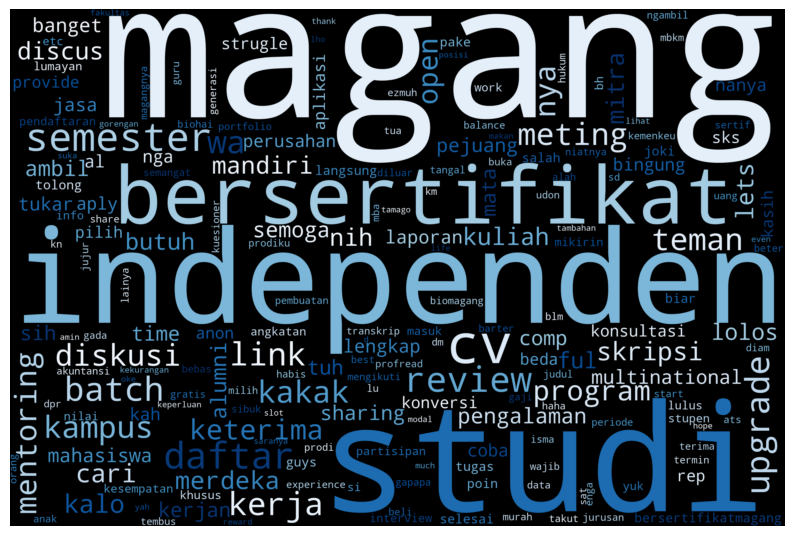

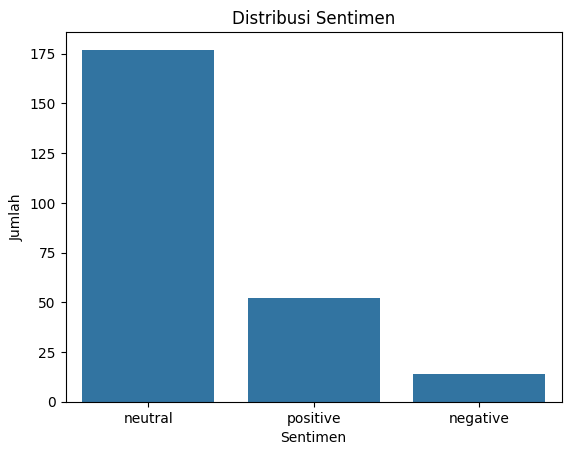

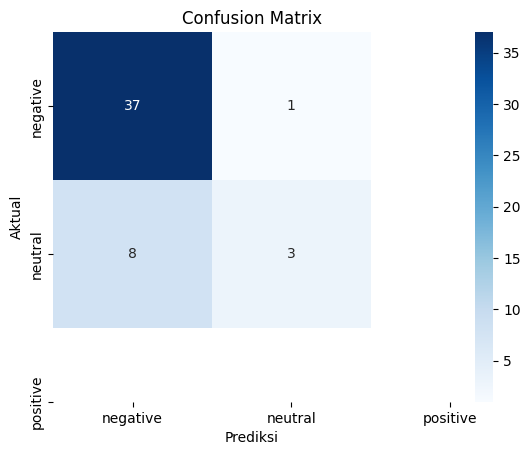

In [118]:
# Visualisasi Workcloud
from wordcloud import WordCloud, STOPWORDS

def plot_cloud(wordcloud):
  plt.figure(figsize=(10, 8))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis('off')
  plt.show()

all_words = ''.join([tweets for tweets in data['tweet']])

wordcloud = WordCloud(
    width=3000,
    height=2000,
    random_state=3,
    background_color='black',
    colormap='Blues_r',
    collocations=False,
    stopwords=STOPWORDS
).generate(all_words)

plot_cloud(wordcloud)

# Visualisasi distribusi sentimen
import seaborn as sns

sns.countplot(x='sentiment', data=data)
plt.title('Distribusi Sentimen')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.show()

# Visualisasi Confusion Matrix
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.show()

In [119]:
data = data[['tweet', 'sentiment']]
data.to_csv('data_final.csv',index=False)
data

,tweet,sentiment
0,magang studi independen bersertifikat magang n...,neutral
1,lowongan magang magang studi independen berser...,neutral
2,semoga keterima magang magang studi independen...,neutral
3,magang magang studi independen bersertifikat k...,neutral
4,manifesting keterima magang msibmandiri posisi...,neutral
...,...,...
247,tim lembaga pengembangan pendidikan pembelajar...,neutral
248,magang magang studi independen bersertifikat b...,neutral
249,prodi kesehatan masyarakat magang magang studi...,neutral
251,hai al open teman aply kerjan magang magang st...,positive


In [120]:
data.shape

(243, 2)